In [1]:
import numpy as np 
import os,time
import pandas as pd
from sklearn.manifold import TSNE
#!conda install tsnecuda -y -c cannylab
#from tsnecuda import TSNE
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
!sed -i 's/from\ pandas.lib\ import\ Timestamp/from\ pandas\ import\ Timestamp/g;' /opt/conda/lib/python3.6/site-packages/ggplot/stats/smoothers.py
from ggplot import *

def dim_reduce(data,initial_dims = None,final_dims=2,use_pca=True):
    initial_dims = data.shape[1] if initial_dims is None else initial_dims
    print('Input data dimensions:',data.shape)
    if use_pca and initial_dims>50:
        pca = PCA(n_components=50)
        pca_result = pca.fit_transform(data)
        print('PCA output shape',pca_result.shape)
        data = pca_result
    time_start = time.time()
    tsne = TSNE(n_components=final_dims, verbose=1, perplexity=30, n_iter=1000)
    tsne_results = tsne.fit_transform(data)
    print('t-SNE done! Time elapsed: %r seconds'%(time.time()-time_start))
    print('t-SNE output shape:',tsne_results.shape)
    return tsne_results

def _2dplot(X_y_tuple,class_vector,hue_vector=None,xlabel='x-tsne',ylabel='y-tsne',hue_label='hue'):
    embeddings = {}
    hue_vector =  class_vector if hue_vector is None else hue_vector
    embeddings[xlabel],embeddings[ylabel] = X_y_tuple
    colours = ['red','blue','green','black','brown','violet','yellow','magenta','orange','purple']
    embeddings['label'] = [ colours[value] for value in class_vector]
    embeddings[hue_label] = hue_vector
    embeddings  = pd.DataFrame.from_dict(embeddings)
    chart = ggplot( embeddings, aes(x=xlabel, y=ylabel, color='label',alpha=hue_label))+ geom_point(size=70)+ ggtitle("tSNE dimensions colored by digit")
    return chart

# embeddings = dim_reduce(X,final_dims=2)
#_2dplot((embeddings[:,0],embeddings[:,1]),y_for_colors,y)

/opt/conda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [2]:
'#####################################################################################'

'#####################################################################################'

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
length = 500
y = y_train[:length]
print(x_train.shape, y.shape)
X=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])[:length]
print(X.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 5s 0us/step
(60000, 28, 28) (500,)
(500, 784)


Input data dimensions: (500, 784)
PCA output shape (500, 50)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 2.933655
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.144417
[t-SNE] KL divergence after 1000 iterations: 0.770106
t-SNE done! Time elapsed: 2.7890796661376953 seconds
t-SNE output shape: (500, 2)


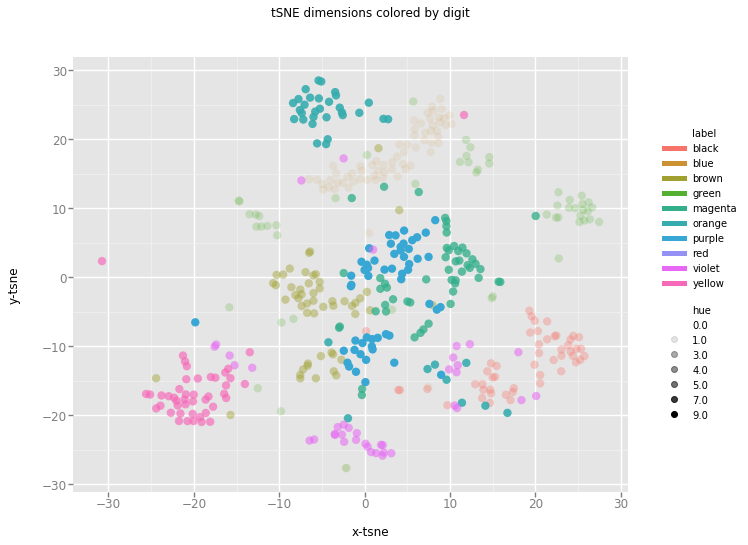

<ggplot: (-9223363251563169136)>

In [4]:
embeddings = dim_reduce(X,final_dims=2)
_2dplot((embeddings[:,0],embeddings[:,1]),y)